In [35]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_theme(context="poster", style="darkgrid", palette="colorblind")

In [11]:
df = pd.read_csv("ETP_fix.csv",index_col=0)
df

,ID,City,Year - From,Year - To,Etruscan,Translation
0,ETP 192,Ager Tarquiniensis,275.0,250.0,cleusinas : laris : larisal : clan,"Laris Cleusinas, son of Laris."
1,Cr 2.20,Caere,675.0,650.0,mi karkanas θahvna,I (am) the container of Karkana
2,Cm 2.46,Campania,500.0,450.0,mi e.i. mi.n.pi capi mi numar | θevru.c.l.na....,'Don't take me. I (am) nunar. (I am the prope...
3,ETP 269,NaN,625.0,600.0,mini muluvanice tetana ve.l.ka.s.na.s. veleli...,Tetana Velkasnas gave me to Velellia.
4,Ta 3.2,Tarquinia,580.0,580.0,itun turuce vene.l a.telinas. tinas dlniiaras,Venel Atelinas dedicated this (vase) to the s...
...,...,...,...,...,...,...
556,ETP 365,Ager Saenensis,600.0,600.0,[---]urθ[---],NaN
557,ETP 366,Ager Saenensis,600.0,600.0,[---]alv[---],NaN
558,ETP 367,Ager Saenensis,600.0,600.0,[---]tinai[---],NaN
559,ETP 368,Ager Faesulanus,600.0,575.0,[---]nutas[---],NaN


### Original cities and fix
(Not used)

In [3]:
cities = sorted(list(set(df["City"].dropna())))
# TODO: 
# Africa/Algeria
# Ager Vulcentanus/Ager Volcentanus+,
# Ager Seanensi/Ager Saenensis,
# Ager Chiusinus/Ager Clusinus,
# Chiusi/Clusium, 
# Falerii/Falerii et Ager Faliscus/Ager Faliscus
# Pisa/Pisae
# Origin Unknown/Unknown/Unknown S
# Volcii/Vulci

# BOOK
# AS = Ager Saenensis; 
# AT = Ager Tarquiniensis; 
# AV = Ager Vulcentanus; 
# Cl = Clusium; 
# Cm = Campania; 
# Co = Cortona; 
# Cr = Caere; 
# Fa = Falerii et Ager Faliscus; 
# Fs = Faesulae; 
# La = Latium; 
# Li = Liguria; 
# Pe = Perusia; 
# Po = Populonia; 
# Ru = Rusellae; 
# Sp = Spina; 
# Ta = Tarquinia; 
# Urn = Umbria; 
# Vc = Vulci; 
# Ve = Veii; 
# Vn = Vetulonia; 
# Vs = Volsinii; 
# Vt = Volaterrae


# CHECK
# +'Aemilia',
# +'Africa',
# +'Ager Caeretanus',
# +'Ager Capenas',
#  -'Ager Chiusinus' -> Ager Clusinus
#  +'Ager Clusinus',
#  +'Ager Faesulanus',
#  -'Ager Faliscus', -> Falerii et Ager Faliscus
#  +'Ager Pisanus',
#  -'Ager Saenensi', -> Ager Saenensis
#  +'Ager Saenensis',
#  +'Ager Tarquiniensis',
#  +'Ager Veientanus',
#  +'Ager Volaterranus',
#  +'Ager Volcentanus',
#  +'Ager Volsiniensis',
#  -'Ager Vulcentanus', -> Ager Volcentanus
#  +'Algeria',
#  +'Arretium',
#  -'Blera', -> Ager Tarquiniensis
#  +'Caere',
#  +'Campania',
#  -'Capua', -> Campania
#  -'Chiusi', -> Clusium
#  +'Clusium',
#  -'Colle di Val D’Elsa', -> Volaterrae
#  +'Cortona',
#  +'Faesulae',
#  -'Falerii', -> Falerii et Ager Faliscus
#  +'Falerii et Ager Faliscus',
#  +'Isola d’Elba',
#  +'Latium',
#  +'Liguria',
#  +'Lucania',
#  +'Narce',
#  -'Origin Unknown',
#  +'Padana',
#  +'Perusia',
#  -'Pisa', -> Pisae
#  +'Pisae',
#  +'Populonia',
#  +'Pyrgi',
#  +'Roma',
#  +'Rusellae',
#  +'Saturnia',
#  +'Spina',
#  +'Tarquinia',
#  -'Tuscania', -> Ager Tarquiniensis
#  +'Umbria',
#  -'Unknown',
#  -'Unknown S',
#  +'Veii',
#  -'Venetia', -> Spina
#  +'Vetulonia',
#  +'Volaterrae',
#  ?'Volcii', -> Vulci
#  +'Volsinii',
#  ?'Vulci'


cities

['Aemilia',
 'Africa',
 'Ager Caeretanus',
 'Ager Capenas',
 'Ager Chiusinus',
 'Ager Clusinus',
 'Ager Faesulanus',
 'Ager Faliscus',
 'Ager Pisanus',
 'Ager Saenensi',
 'Ager Saenensis',
 'Ager Tarquiniensis',
 'Ager Veientanus',
 'Ager Volaterranus',
 'Ager Volcentanus',
 'Ager Volsiniensis',
 'Ager Vulcentanus',
 'Algeria',
 'Arretium',
 'Blera',
 'Caere',
 'Campania',
 'Capua',
 'Chiusi',
 'Clusium',
 'Colle di Val D’Elsa',
 'Cortona',
 'Faesulae',
 'Falerii',
 'Falerii et Ager Faliscus',
 'Isola d’Elba',
 'Latium',
 'Liguria',
 'Lucania',
 'Narce',
 'Origin Unknown',
 'Padana',
 'Perusia',
 'Pisa',
 'Pisae',
 'Populonia',
 'Pyrgi',
 'Roma',
 'Rusellae',
 'Saturnia',
 'Spina',
 'Tarquinia',
 'Tuscania',
 'Umbria',
 'Unknown',
 'Unknown S',
 'Veii',
 'Venetia',
 'Vetulonia',
 'Volaterrae',
 'Volcii',
 'Volsinii',
 'Vulci']

In [5]:
# fix = {
#     'Ager Chiusinus': "Ager Clusinus",
#     'Ager Faliscus': "Falerii et Ager Faliscus",
#     'Ager Saenensi': "Ager Saenensis",
#     'Ager Vulcentanus': "Ager Volcentanus", 
#     'Blera': "Ager Tarquiniensis",
#     'Capua': "Campania",
#     'Chiusi': "Clusium",
#     'Colle di Val D’Elsa':"Volaterrae",
#     'Falerii': "Falerii et Ager Faliscus",
#     'Origin Unknown': None,
#     'Pisa': "Pisae",
#     'Tuscania':"Ager Tarquiniensis",
#     'Unknown': None,
#     'Unknown S': None,
#     'Venetia': "Spina",
#     'Volcii': "Vulci",
# }

In [6]:
# for k, v in fix.items():
#     mask = df["City"] == k
#     df["City"].iloc[mask] = v

# df

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,ID,City,Year - From,Year - To,Etruscan,Translation
0,ETP 192,Ager Tarquiniensis,275.0,250.0,cleusinas : laris : larisal : clan,"Laris Cleusinas, son of Laris."
1,Cr 2.20,Caere,675.0,650.0,mi karkanas θahvna,I (am) the container of Karkana
2,Cm 2.46,Campania,500.0,450.0,mi e.i. mi.n.pi capi mi numar | θevru.c.l.na....,'Don't take me. I (am) nunar. (I am the prope...
3,ETP 269,NaN,625.0,600.0,mini muluvanice tetana ve.l.ka.s.na.s. veleli...,Tetana Velkasnas gave me to Velellia.
4,Ta 3.2,Tarquinia,580.0,580.0,itun turuce vene.l a.telinas. tinas dlniiaras,Venel Atelinas dedicated this (vase) to the s...
...,...,...,...,...,...,...
556,ETP 365,Ager Saenensis,600.0,600.0,[---]urθ[---],NaN
557,ETP 366,Ager Saenensis,600.0,600.0,[---]alv[---],NaN
558,ETP 367,Ager Saenensis,600.0,600.0,[---]tinai[---],NaN
559,ETP 368,Ager Faesulanus,600.0,575.0,[---]nutas[---],NaN


In [9]:
# df.to_csv("ETP_fix.csv")

# Location

In [15]:
city_freq = Counter(df["City"].dropna().to_list())

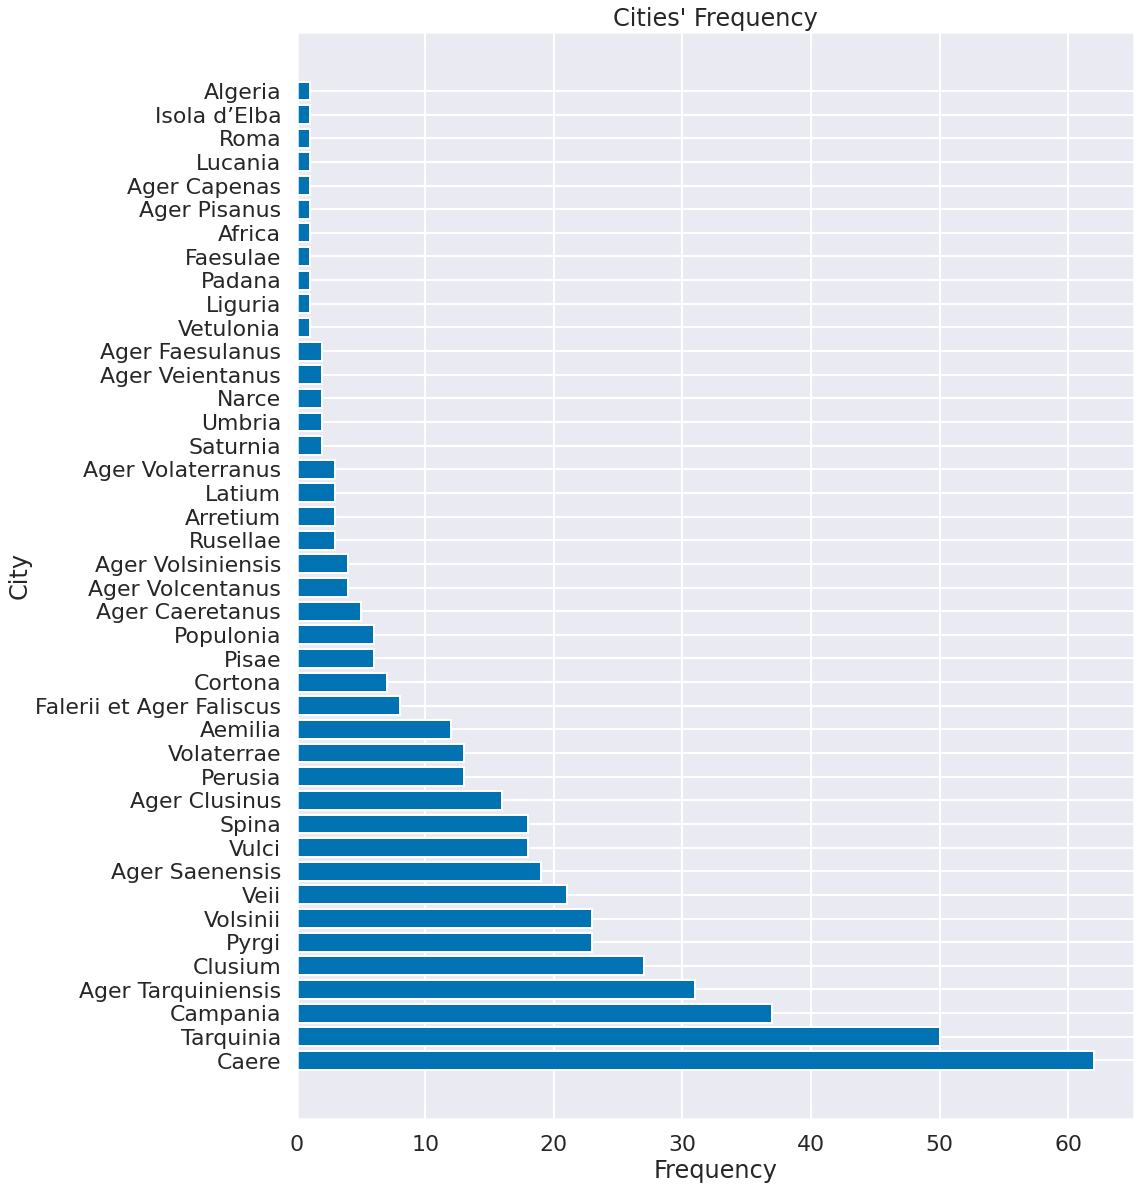

In [50]:
common = city_freq.most_common()
# labels = [k for k, _ in city_freq.items()]
# freqs =  [v for _, v in city_freq.items()]
labels = [i[0] for i in common]
freqs =  [i[1] for i in common]
cols = len(city_freq)

plt.figure(figsize=(15,20))
plt.title("Cities' Frequency")
plt.barh(range(cols), freqs, tick_label=labels)
plt.xlabel("Frequency")
plt.ylabel("City")
plt.show()

In [48]:
tmp = pd.DataFrame.from_records(common, columns=["City", "Freq."])
print(tmp.to_markdown(index=False))

| City                     |   Freq. |
|:-------------------------|--------:|
| Caere                    |      62 |
| Tarquinia                |      50 |
| Campania                 |      37 |
| Ager Tarquiniensis       |      31 |
| Clusium                  |      27 |
| Pyrgi                    |      23 |
| Volsinii                 |      23 |
| Veii                     |      21 |
| Ager Saenensis           |      19 |
| Vulci                    |      18 |
| Spina                    |      18 |
| Ager Clusinus            |      16 |
| Perusia                  |      13 |
| Volaterrae               |      13 |
| Aemilia                  |      12 |
| Falerii et Ager Faliscus |       8 |
| Cortona                  |       7 |
| Pisae                    |       6 |
| Populonia                |       6 |
| Ager Caeretanus          |       5 |
| Ager Volcentanus         |       4 |
| Ager Volsiniensis        |       4 |
| Rusellae                 |       3 |
| Arretium               

In [49]:
print(tmp.to_latex(index=False))

\begin{tabular}{lr}
\toprule
                    City &  Freq. \\
\midrule
                   Caere &     62 \\
               Tarquinia &     50 \\
                Campania &     37 \\
      Ager Tarquiniensis &     31 \\
                 Clusium &     27 \\
                   Pyrgi &     23 \\
                Volsinii &     23 \\
                    Veii &     21 \\
          Ager Saenensis &     19 \\
                   Vulci &     18 \\
                   Spina &     18 \\
           Ager Clusinus &     16 \\
                 Perusia &     13 \\
              Volaterrae &     13 \\
                 Aemilia &     12 \\
Falerii et Ager Faliscus &      8 \\
                 Cortona &      7 \\
                   Pisae &      6 \\
               Populonia &      6 \\
         Ager Caeretanus &      5 \\
        Ager Volcentanus &      4 \\
       Ager Volsiniensis &      4 \\
                Rusellae &      3 \\
                Arretium &      3 \\
                  Latium &      3 \\


In [53]:
tmp["Freq."].describe()

count    42.000000
mean     10.857143
std      13.974841
min       1.000000
25%       1.250000
50%       4.000000
75%      17.500000
max      62.000000
Name: Freq., dtype: float64

In [54]:
df["City"].describe()

count       456
unique       42
top       Caere
freq         62
Name: City, dtype: object

In [58]:
print(f"Missing location: {df['City'].isna().sum()}/{len(df['City'])}")

Missing location: 105/561


# Dates

In [70]:
from_ = df["Year - From"]
to_ = df["Year - To"]
mid_ = from_ - (from_ - to_) / 2
span = from_-to_

In [71]:
print("From:")
print("None\t", from_.isna().sum())
print(from_.describe())
print("To:")
print("None\t", to_.isna().sum())
print(to_.describe())
print("Mid:")
print("None\t", mid_.isna().sum())
print(mid_.describe())
print("Span:")
print("None\t", span.isna().sum())
print(span.describe())

From:
None	 203
count    358.000000
mean     431.913408
std      163.696911
min       50.000000
25%      300.000000
50%      500.000000
75%      572.500000
max      700.000000
Name: Year - From, dtype: float64
To:
None	 203
count    358.000000
mean     386.312849
std      173.822835
min        0.000000
25%      250.000000
50%      400.000000
75%      500.000000
max      675.000000
Name: Year - To, dtype: float64
Mid:
None	 203
count    358.000000
mean     409.113128
std      167.189025
min       50.000000
25%      278.750000
50%      450.000000
75%      550.000000
max      687.500000
dtype: float64
Span:
None	 203
count    358.000000
mean      45.600559
std       47.047145
min        0.000000
25%        0.000000
50%       50.000000
75%       50.000000
max      200.000000
dtype: float64


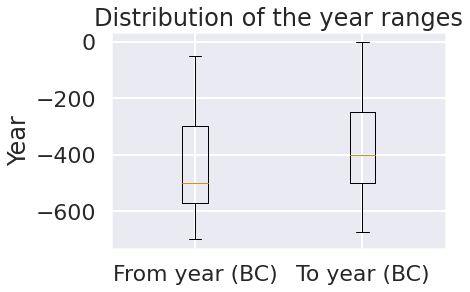

In [86]:
plt.title("Distribution of the year ranges")
# plt.hist(-from_, label="From year (BC)")
# plt.hist(-to_, label="To year (BC)")
plt.boxplot([-from_.dropna(), -to_.dropna()], labels=["From year (BC)", "To year (BC)"])
plt.ylabel("Year")
plt.show()

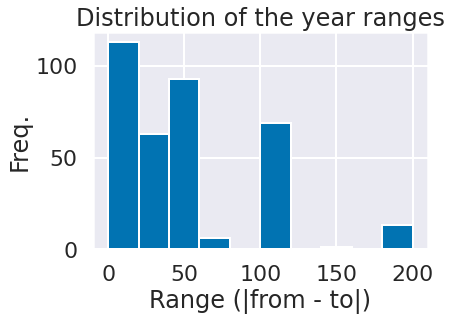

In [88]:
plt.title("Distribution of the year ranges")
plt.hist(span)
plt.ylabel("Freq.")
plt.xlabel("Range (|from - to|)")
plt.show()

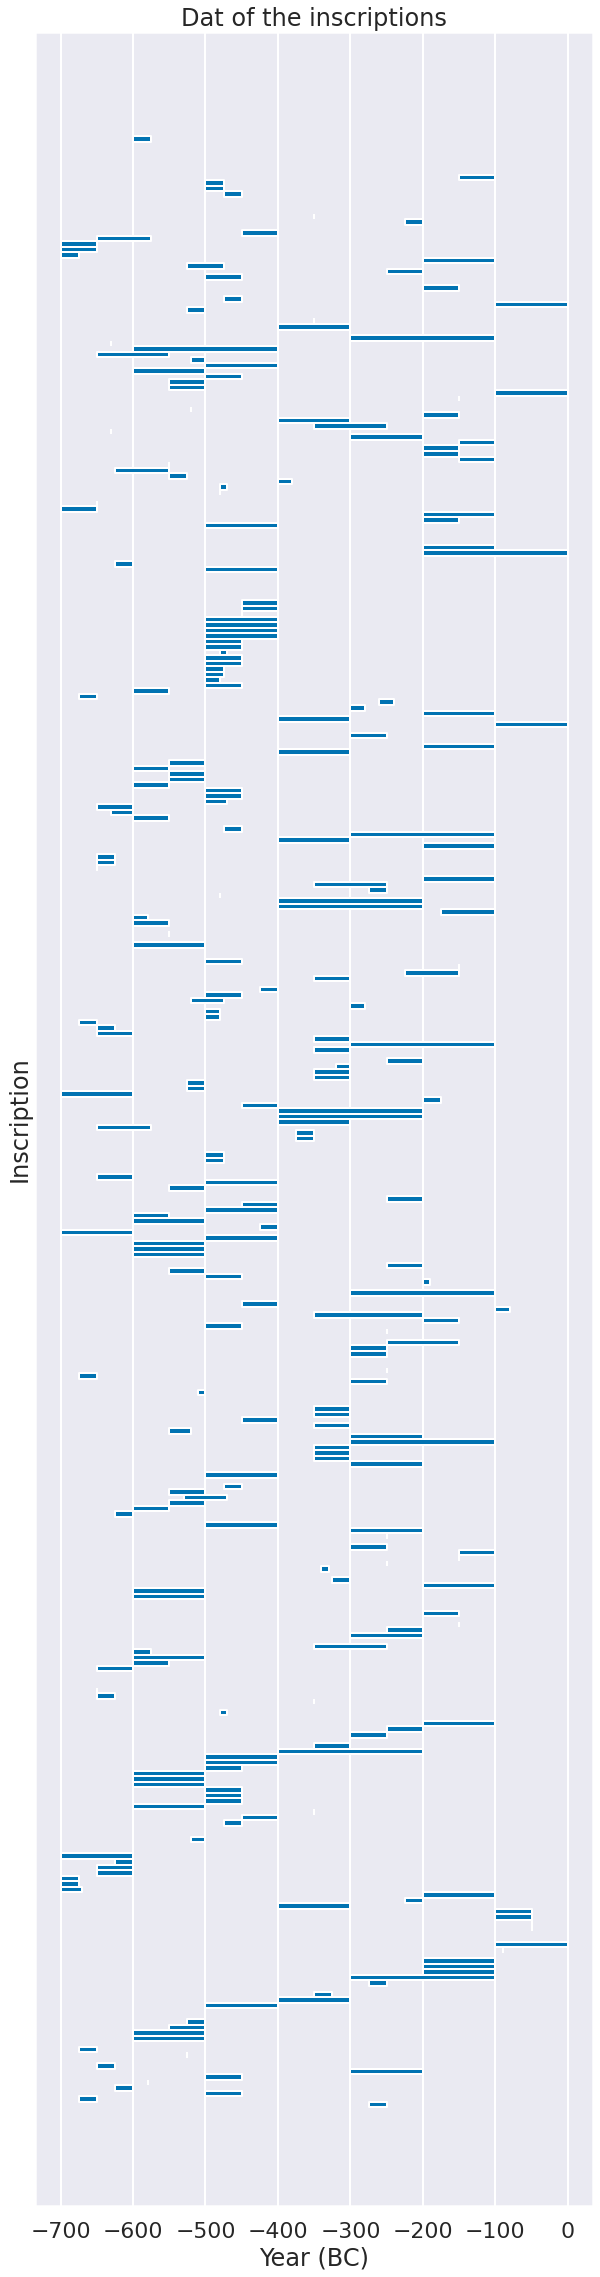

In [103]:
xranges = [(i, j) for i, j in zip(-from_.dropna(), span.dropna())]
yranges = [(i, 1) for i in range(len(from_.dropna()))]
plt.figure(figsize=(10,40))
for x, y in zip(xranges, yranges):
    plt.broken_barh([x], y)
plt.title("Dat of the inscriptions")
plt.yticks([])
plt.xlabel("Year (BC)")
plt.ylabel("Inscriptions")
plt.show()

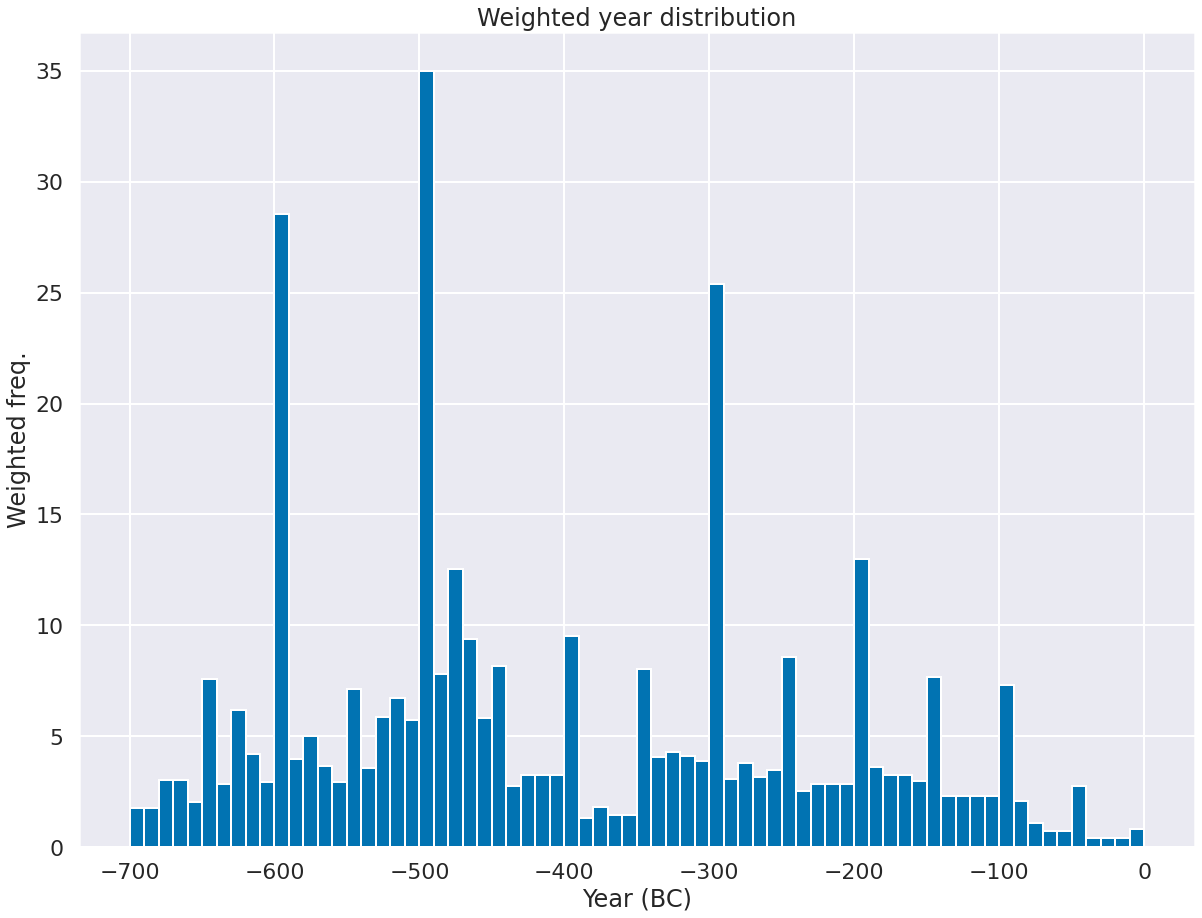

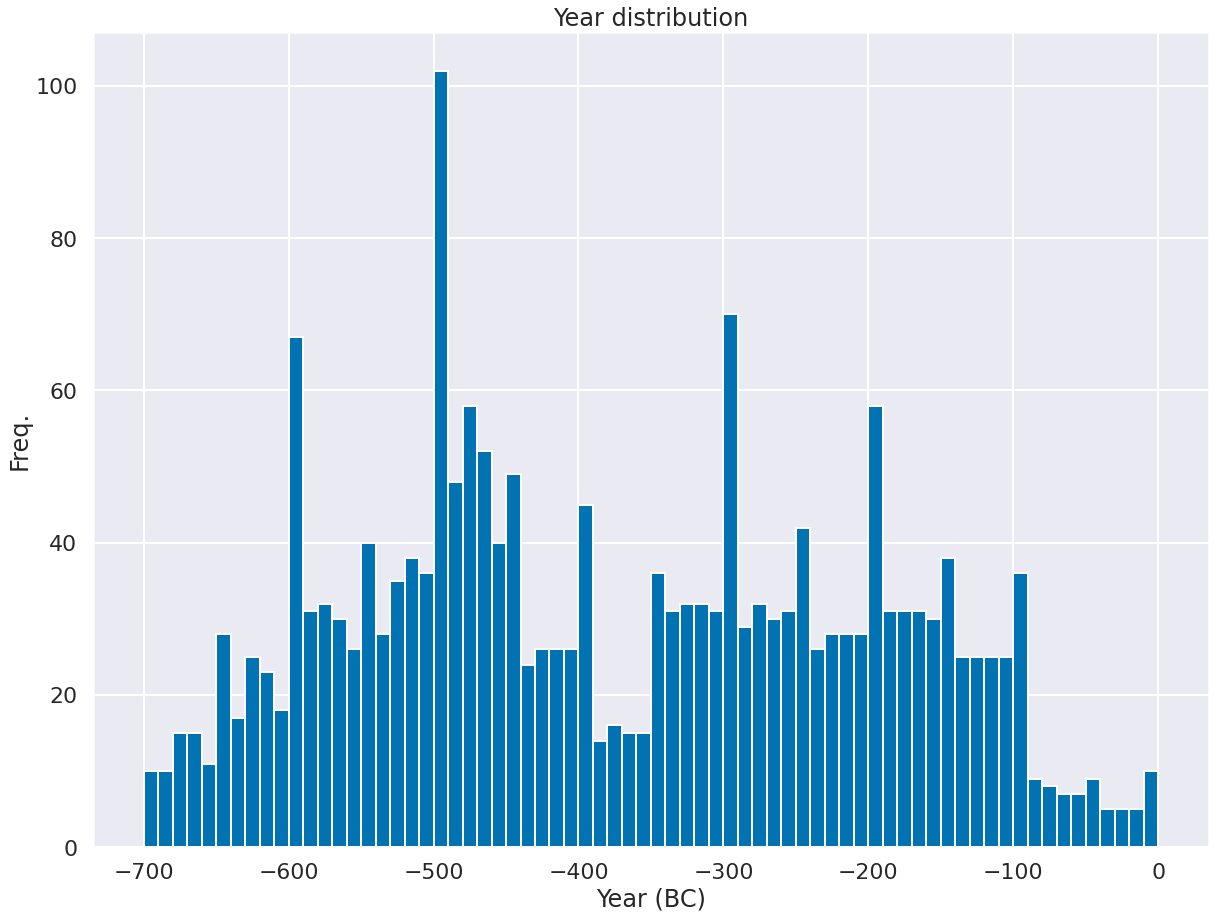

In [110]:
x = []
w = []
for f, t in zip(from_.dropna().astype(int), to_.dropna().astype(int)):
    x.append(list(range(-f, -t+10, 10)))
    l = len(x[-1])
    w.append([1/l for i in x[-1]])
x = [j for i in x for j in i]
w = [j for i in w for j in i]

plt.figure(figsize=(20, 15))
plt.title("Weighted year distribution")
plt.xlabel("Year (BC)")
plt.ylabel("Weighted freq.")
plt.hist(x, weights=w, bins=70)
plt.show()

plt.figure(figsize=(20, 15))
plt.title("Year distribution")
plt.xlabel("Year (BC)")
plt.ylabel("Freq.")
plt.hist(x, bins=70)
plt.show()

# Grammatical categories

In [147]:
df = pd.read_csv("ETP_POS.csv", index_col=0,)
df

,Etruscan,Translations,POS,Is inferred,Is suffix,Abbreviation of,Suffix indexes,city name,place name,name,...,loc,1st pert,2nd pert,1st pers,2nd pers,3rd pers,pl,gen,abl,pert
0,ri,"((True, 'on behalf of'),)",post,False,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
1,ca,"((True, 'the'),)",dem pro nom acc,False,True,NaN,NaN,NaN,NaN,NaN,...,False,False,False,NaN,NaN,NaN,NaN,False,False,False
2,pi,(),enclitic particle,False,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
3,ς'va,"((True, 'the'),)",def art pl nom,False,True,NaN,NaN,NaN,NaN,NaN,...,False,False,False,NaN,NaN,NaN,True,False,False,False
4,ti,"((True, 'in'),)",post,False,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,flereσ,"((True, 'divine spirit'), (True, 'divinity'))",1st gen,False,False,NaN,NaN,NaN,NaN,NaN,...,False,False,False,NaN,NaN,NaN,NaN,True,False,False
1118,flerθrce,(),past act,False,False,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
1119,fratuce,"((False, 'incised'),)",past act,False,False,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
1120,frontac,"((True, 'of lightning'),)",nom acc,False,False,NaN,NaN,NaN,NaN,NaN,...,False,False,False,NaN,NaN,NaN,NaN,False,False,False


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1122 entries, 0 to 1121
Data columns (total 64 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Etruscan           1122 non-null   object 
 1   Translations       1122 non-null   object 
 2   POS                1065 non-null   object 
 3   Is inferred        1122 non-null   bool   
 4   Is suffix          1122 non-null   bool   
 5   Abbreviation of    38 non-null     object 
 6   Suffix indexes     154 non-null    object 
 7   city name          17 non-null     object 
 8   place name         17 non-null     object 
 9   name               17 non-null     object 
 10  epithet            6 non-null      object 
 11  theo               44 non-null     object 
 12  cogn               479 non-null    object 
 13  prae               479 non-null    object 
 14  nomen              479 non-null    object 
 15  nom                882 non-null    object 
 16  acc                865 n

In [158]:
counts = []
for col in df.columns[7:-3]:
    # True (include uncertain), False, NaN
    
    # FIX: "True"/"False"/"dubious" instead of True/False/"dubious"
    tmp = df[col]
    na = tmp.isna().sum()
    F = (tmp == "False").sum()
    T = len(tmp) - F - na
    counts.append((col, T, F, na))
counts = pd.DataFrame.from_records(counts, columns=("Feature", "True", "False", "NaN"))
counts = counts.sort_values(by=['True'], ascending=True)
counts

,Feature,True,False,NaN
36,conj,0,0,1122
51,2nd pers,1,0,1121
30,deictic particle,2,0,1120
1,place name,3,14,1105
52,3rd pers,3,0,1119
25,necess,4,0,1118
40,subord,4,0,1118
39,rel,4,0,1118
41,neg,5,0,1117
3,epithet,6,0,1116


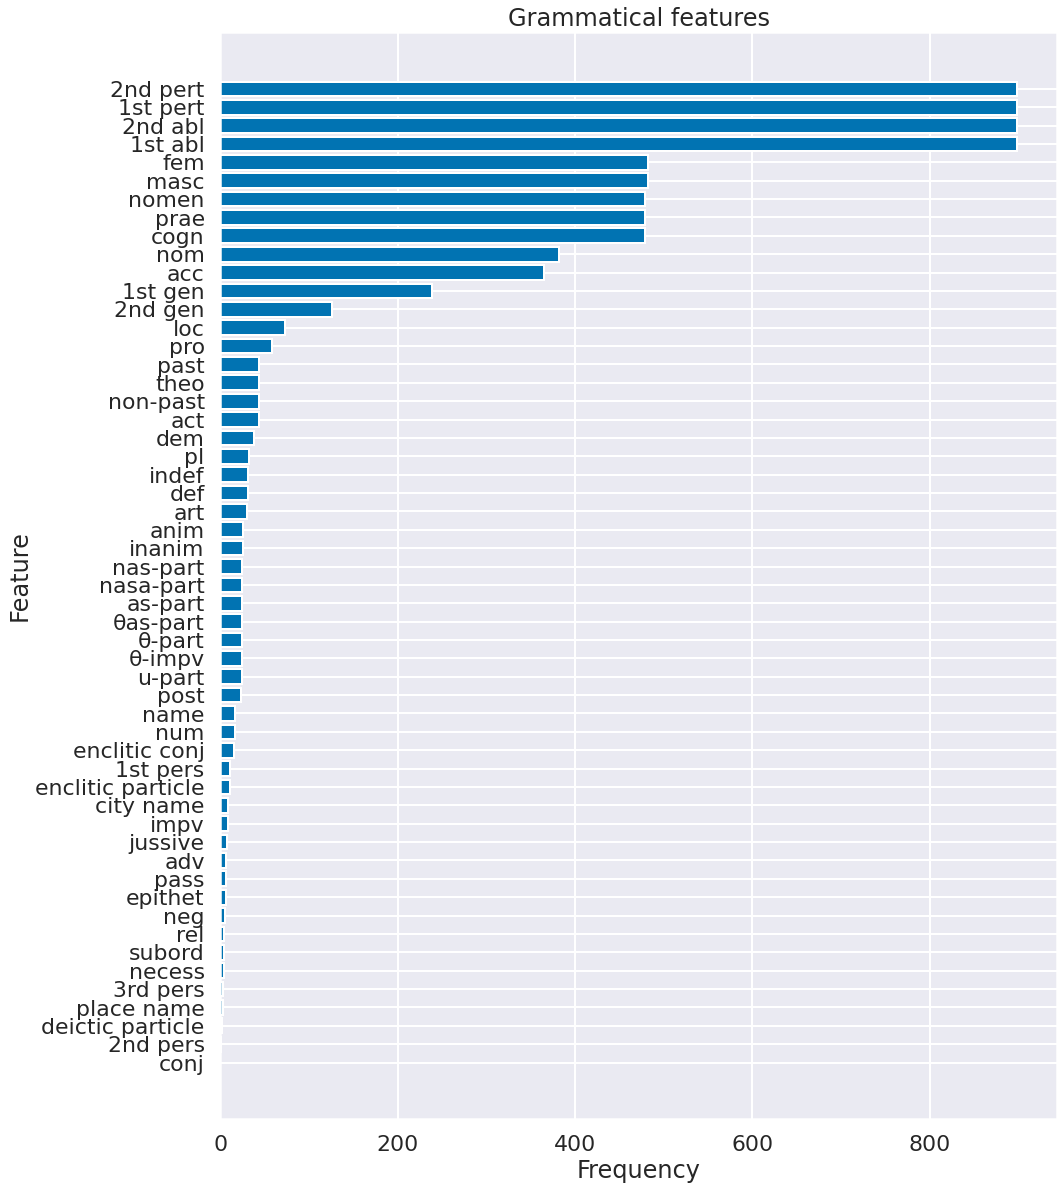

In [160]:
cols = len(counts)

plt.figure(figsize=(15,20))
plt.title("Grammatical features")
plt.barh(range(cols), counts["True"], tick_label=counts["Feature"])
plt.xlabel("Frequency")
plt.ylabel("Feature")
plt.show()

In [170]:
print("Inferred:", df["Is inferred"].sum())
print("Suffixes:", df["Is suffix"].sum())
print("Abbreviations:", df["Abbreviation of"].count())
print("Translations:", df["Translations"].map(lambda x: len(x) != 2).sum()) # It is a string :'(

Inferred: 37
Suffixes: 141
Abbreviations: 38
Translations: 955


In [164]:
counts.shape

(54, 4)

0       25
1       16
2        2
3       16
4       15
        ..
1117    45
1118     2
1119    21
1120    25
1121     2
Name: Translations, Length: 1122, dtype: int64